This is an introduction to evolutionary computation in Python with NumPy.

In [2]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
class Candidate:
    def __init__(self, xm, fit):
        self.xm = xm
        self.fit = fit

    def __gt__(self, mutation2):
        return self.fit > mutation2.fit

    def __str__(self):
        return "Mutation-Fitness: " + str(self.fit)

def sphere_function(value):
    return np.dot(value.T, value)


def rosenbrock_function(value):
    n = len(value)
    _sum = 0

    for i in range(n - 1):
        _sum += 100 * (value[i] ** 2 - value[i+1]) ** 2 + (value[i] - 1) ** 2
    return _sum


def rastrigin_function(value):
    A = 10
    n = len(value)
    _sum = 0

    for i in range(n):
        _sum += value[i] ** 2 - A * np.cos(2 * np.pi * value[i])
    return A * n + _sum

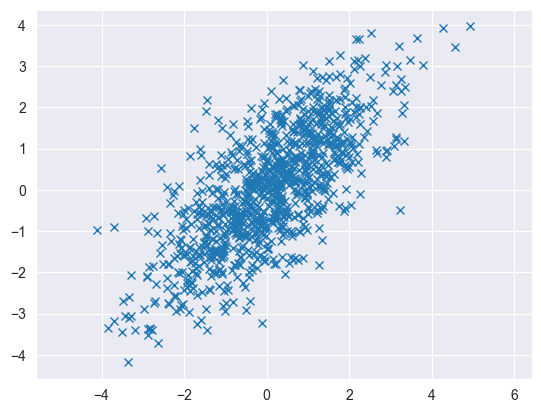

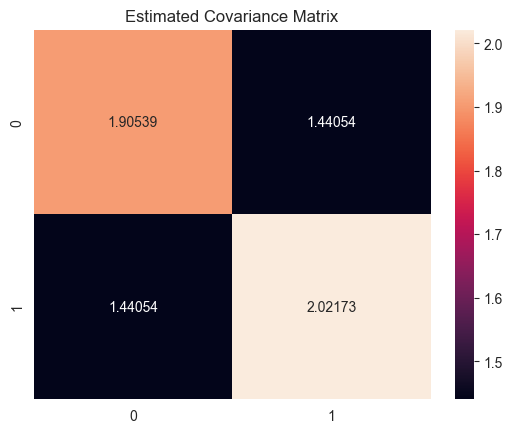

The generation 1 is: Mutation-Fitness: 14.595075847510936 Next sigma: 1.0
The generation 2 is: Mutation-Fitness: 8.734319464974973 Next sigma: 1.0
The generation 3 is: Mutation-Fitness: 5.008048220381108 Next sigma: 1.0
The generation 4 is: Mutation-Fitness: 1.5799689518142008 Next sigma: 1.0
The generation 5 is: Mutation-Fitness: 1.4486927210586098 Next sigma: 1.0
The generation 6 is: Mutation-Fitness: 0.9638907026279755 Next sigma: 1.0
The generation 7 is: Mutation-Fitness: 0.9638907026279755 Next sigma: 1.0
The generation 8 is: Mutation-Fitness: 0.9638907026279755 Next sigma: 1.0
The generation 9 is: Mutation-Fitness: 0.48841284055500855 Next sigma: 1.0
The generation 10 is: Mutation-Fitness: 0.48841284055500855 Next sigma: 1.0
The generation 11 is: Mutation-Fitness: 0.48841284055500855 Next sigma: 1.0
The generation 12 is: Mutation-Fitness: 0.48841284055500855 Next sigma: 1.0
The generation 13 is: Mutation-Fitness: 0.3108885518008987 Next sigma: 1.0
The generation 14 is: Mutation-F

In [17]:
N = 5
x = 2 * np.ones(N)
generation = 1
_lambda = 20
sigma = 1.0
population = []

# Sampling 1,000 points for multivariate normal distribution with handmade covariance matrix
mean = [0, 0]
C_handmade = [[2, 1.5],
             [1.5, 2]]
x_cov, y_cov = np.random.multivariate_normal(mean, C_handmade, 1000).T
plt.plot(x_cov, y_cov, 'x')
plt.axis('equal')
plt.show()

# Estimate covariance matrix by NumPy
C_estimated = np.cov(x_cov, y_cov)
sn.heatmap(C_estimated, annot=True, fmt='g')
plt.title('Estimated Covariance Matrix')
plt.show()

# 100 Generations
while generation <= 100:

    # Create lambda offsprings per generation
    for o in range(1, _lambda):
        # Create and mutate offspring
        x_ = x + sigma * np.random.randn(N)
        fitness = sphere_function(x_)
        candidate = Candidate(x_, fitness)
        population.append(candidate)

    # Select the 1 best candidate (x_, z) by sorting fitness
    population.sort()
    population = population[:1]
    best = population[0]
    x = best.xm

    print("The generation", generation, "is:", ", ".join([str(m) for m in population]), "Next sigma:", sigma)

    generation += 1

# Benchmark Results
## Sphere:

## Rosenbrock:

## Rastrigin: